<a href="https://colab.research.google.com/github/salmanarif86/MLAI/blob/master/IATA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install spacy_cld

In [0]:
!pip install spacy-langdetect

### The following program is a attempt to perform multiclass, multiple classification problem. I am attempting to use modern NLP techniques to solve this classfication problem. This is a dataset provided by IATA with incidents summary provided by passengers in about 10 different languages. The incidents are then classified which has been provided to us as labelled data set. I will first identify languages using SpaCy and then translate the language to English using google's NLP language translation API. The next step would be to use pre-trained word embedding GloVe to get a vector reprsentation of all the text in my training set and then use logistic, svm and XGBoost to train my model. Since it is a multi label classifcation problem it has to be strutured as 22 indiviual binary classification problem. 22 because there are a total of 22 target labels in the dataset.

### My next step would be to use a LSTM network to perform the same classification problem. I will also attempt to use Keras embedding layer to train my embedding from scratch and  check the peroformance of my classiication task. I will also create my own word2vec model using the dataset I have and see if there is any performance imporovement

import all important packages including the LanguageDetector provided natively by SpaCy

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
from spacy_cld import LanguageDetector
sns.set()

The first step is to create a dataframe by importing .csv file and using latin encoding as there are quite a few other languages than english. This i found to be the best way to import data when we have other roman languages

In [0]:
df = pd.read_csv('IATA.csv',encoding='latin1')

My first step is to quickly see the shape of my dataframe. This gives me quick access to the number of examples and features that I will be dealing with

In [0]:
df.shape

(20000, 25)

Then i will check the data completeness to see if I have missing data. Looks like i have 16 missing Summary descriptions and 5 missing event titles. However compared to the 20000 examples that I have its safe to drop these rows

In [0]:
df.isna().sum()

Report ID                           0
EventTitle                          5
Summary                            16
Altitude Deviation                  0
Birdstrike                          0
Deep Landing                        0
EGPWS                               0
Hard/Heavy Landing                  0
Runway/Taxiway Incursion            0
Rejected Take Off                   0
Stall Warning                       0
TCAS                                0
Unstable Approach                   0
Cabin Fire/Smoke/Fumes              0
Inadvertant Slide Deployment        0
Passenger and Cabin Crew Injury     0
Rapid Deplaning and Evacuation      0
Turbulence                          0
Brakes and Steering                 0
Cabin Pressurization                0
Engine Surge and Stall              0
Engine Shutdown                     0
Flight Controls                     0
ATC Service Standard                0
Security                            0
dtype: int64

In [0]:
df.dropna(subset=['Summary','EventTitle'],inplace=True)

In [0]:
df.reset_index(drop =True, inplace=True)


Loading the LanguageDectotor package from SpaCy ,instantiating and then addidng this to the pipeline

In [0]:
nlp = spacy.load('en')

In [0]:

language_detector = LanguageDetector()

In [0]:
nlp.add_pipe(language_detector)

Function to remove all ascii characters

In [0]:
def remove_non_ascii(text):
    return ''.join(i for i in text if ord(i)<128)
 


In [0]:
df['Summary'] = df['Summary'].apply(remove_non_ascii)

Applying the language Detection pipeline to the summary column of our database. Creating a list of all the languages corresponding to each row of our summary data and then putting this altogether in a dataframe

In [0]:
docx = df['Summary'].apply(nlp)

In [0]:
languages=[]
for i in docx:
  languages.append(i._.languages)

In [0]:
df_lang = pd.DataFrame(languages)


In [0]:
df_lang.rename(index= str, columns={0: 'Language', 1: 'Language2'},inplace=True)

In [0]:
df_lang.shape

(19979, 2)

In [0]:
df_lang['Language'].unique()

array(['en', 'es', 'fr', 'pt', None, 'de', 'gl', 'is', 'tr', 'nl', 'da',
       'sv', 'cs', 'fi', 'ia', 'hu', 'gd', 'nn', 'la'], dtype=object)

In [0]:
df_lang['LangMap']=df_lang['Language'].map({'en' :'Engllish','es':'Español','fr':'French','pt':'Portuguese','de':'German','gl':'Galician','is':'Icelandic','tr':'Turkish',
                        'nl':'Dutch','sv' : 'Swedish','cs' : 'Czech','fi' :'Finnish', 'ia':'Interlingua','hu':'Hungarian','gd':'Gaelic','nn':'Norwegian Nynorsk','la':'Latin'})


In [0]:
df_merge= pd.concat([df, df_lang], axis = 1)

In [0]:
df_lang.reset_index(drop =True, inplace=True)


RangeIndex(start=0, stop=19979, step=1)

In [0]:
df_merge = df.merge(df_lang,left_index=True, right_index=True)

In [0]:
df_final = df_merge[['Report ID',
 'EventTitle',
 'Summary',
 'LangMap',
 'Altitude Deviation',
 'Birdstrike',
 'Deep Landing',
 'EGPWS',
 'Hard/Heavy Landing',
 'Runway/Taxiway Incursion',
 'Rejected Take Off',
 'Stall Warning',
 'TCAS',
 'Unstable Approach',
 'Cabin Fire/Smoke/Fumes',
 'Inadvertant Slide Deployment',
 'Passenger and Cabin Crew Injury',
 'Rapid Deplaning and Evacuation',
 'Turbulence',
 'Brakes and Steering',
 'Cabin Pressurization',
 'Engine Surge and Stall',
 'Engine Shutdown',
 'Flight Controls',
 'ATC Service Standard',
 'Security',
 'Language',
 'Language2',
]]

In [0]:
df_merge[df_merge['LangMap'] == 'Czech'].loc[4475]['Summary']

'cas cca 4:20 utc- upozorneni od cestujiciho sediciho na leve strane u motoru na unik kapaliny z leveho motoru- f / o provedl vizualni kontrolu a potvrdil unik kapaliny tekouci po spodni zadni casti krytu motoru- ******************* vizualni kontrolu, s potvrzenim uniku. tekouci cira kapalina po krytu motoru- *************************************** ******** ********* ve fl190. komunikace s atc - ***************** situace konzultovana s opc a mcc - v celem case probihala komunika s vk o vznikle situaci- f / o provedl jeste jednou vizualni kontrolu se stejnym zjistenim- cptosobne oznamil vk o nutnosti vypnout levy motor a vyhlasil pripravu kabiny na nouzovou situaci, s navratem do prg. max 20 min na pripravu- ************* *************** vyhlasen pan pan pan a nasledne klesani do fl100 a direct *************** single engine operation checklist- na atc oznameno pocet cestujicich, *************** na palube a dg (zadne) a viditelny unik paliva z leveho motoru- ****** ************** cca ve 

In [0]:
import spacy.cli
spacy.cli.download("en_core_web_lg")

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


# New Section

In [0]:
from google.cloud import translate_v2
from google.cloud import storage
#client = translate.Client.from_service_account_json('/content/My First Project-da1df09996b6.json')
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "/content/My First Project-da1df09996b6.json"

In [0]:
def translate_text(text, target ='en'):
  translation = translate_client.translate(text, target_language= target)
  return translation['translatedText']
  

In [0]:
df_final['Trans']=df_final[df_final['LangMap']=='Turkish']['Summary'].apply(lambda x : translate_text(x))
#df_final['Trans']=df_final[df_final['LangMap']=='Latin']['Summary'].apply(lambda x : translate_text(x))

df_test1 = df_final

In [0]:
df_test1['Trans']=df_test1[['Summary','LangMap','Trans']].apply(lambda x : translate_text(x['Summary']) if x['LangMap']=='Latin' else x['Trans'], axis = 1)

In [0]:
df_test1['Trans']=df_test1[['Summary','LangMap','Trans']].apply(lambda x : translate_text(x['Summary']) if x['LangMap']=='Hungarian' else x['Trans'], axis = 1)

In [0]:
df_test1['Trans']=df_test1[['Summary','LangMap','Trans']].apply(lambda x : translate_text(x['Summary']) if x['LangMap']=='Norwegian Nynorsk' else x['Trans'], axis = 1)

In [0]:
df_test1['Trans']=df_test1[['Summary','LangMap','Trans']].apply(lambda x : translate_text(x['Summary']) if x['LangMap']=='Gaelic' else x['Trans'], axis = 1)

In [0]:
df_test1['Trans']=df_test1[['Summary','LangMap','Trans']].apply(lambda x : translate_text(x['Summary']) if x['LangMap']=='Icelandic' else x['Trans'], axis = 1)

In [0]:
df_test1['Trans']=df_test1[['Summary','LangMap','Trans']].apply(lambda x : translate_text(x['Summary']) if x['LangMap']=='Interlingua' else x['Trans'], axis = 1)

In [0]:
df_test1['Trans']=df_test1[['Summary','LangMap','Trans']].apply(lambda x : translate_text(x['Summary']) if x['LangMap']=='Finnish' else x['Trans'], axis = 1)

In [0]:
df_test1['Trans']=df_test1[['Summary','LangMap','Trans']].apply(lambda x : translate_text(x['Summary']) if x['LangMap']=='Czech' else x['Trans'], axis = 1)

In [0]:
df_test1['Trans']=df_test1[['Summary','LangMap','Trans']].apply(lambda x : translate_text(x['Summary']) if x['LangMap']=='Swedish' else x['Trans'], axis = 1)

In [0]:
df_test1['Trans']=df_test1[['Summary','LangMap','Trans']].apply(lambda x : translate_text(x['Summary']) if x['LangMap']=='Dutch' else x['Trans'], axis = 1)

In [0]:
df_test1['Trans']=df_test1[['Summary','LangMap','Trans']].apply(lambda x : translate_text(x['Summary']) if x['LangMap']=='German' else x['Trans'], axis = 1)

In [0]:
df_test1['Trans']=df_test1[['Summary','LangMap','Trans']].apply(lambda x : translate_text(x['Summary']) if x['LangMap']=='Galician' else x['Trans'], axis = 1)

In [0]:
df_test1['Trans']=df_test1[['Summary','LangMap','Trans']].apply(lambda x : translate_text(x['Summary']) if x['LangMap']=='Portuguese' else x['Trans'], axis = 1)

In [0]:
df_test1['Trans']=df_test1[['Summary','LangMap','Trans']].apply(lambda x : x['Summary'] if x['LangMap']=='Engllish' else x['Trans'], axis = 1)

In [0]:
df_test.columns.values

In [0]:
df_test1 = df_test1[['Report ID', 'EventTitle', 'Summary', 'LangMap','Trans',
       'Altitude Deviation', 'Birdstrike', 'Deep Landing', 'EGPWS',
       'Hard/Heavy Landing', 'Runway/Taxiway Incursion',
       'Rejected Take Off', 'Stall Warning', 'TCAS', 'Unstable Approach',
       'Cabin Fire/Smoke/Fumes', 'Inadvertant Slide Deployment',
       'Passenger and Cabin Crew Injury',
       'Rapid Deplaning and Evacuation', 'Turbulence',
       'Brakes and Steering', 'Cabin Pressurization',
       'Engine Surge and Stall', 'Engine Shutdown', 'Flight Controls',
       'ATC Service Standard', 'Security', 'Language', 'Language2']]

In [0]:
df_test1.to_csv('IATA_transformed.csv')

In [0]:
df_test1[df_test1['LangMap']=='French'].shape

(153, 29)

In [0]:
df_translation = pd.read_csv('IATA_transformed.csv', index_col=0)

In [0]:
df_translation.sample(5)

,Report ID,EventTitle,Summary,LangMap,Trans,Altitude Deviation,Birdstrike,Deep Landing,EGPWS,Hard/Heavy Landing,Runway/Taxiway Incursion,Rejected Take Off,Stall Warning,TCAS,Unstable Approach,Cabin Fire/Smoke/Fumes,Inadvertant Slide Deployment,Passenger and Cabin Crew Injury,Rapid Deplaning and Evacuation,Turbulence,Brakes and Steering,Cabin Pressurization,Engine Surge and Stall,Engine Shutdown,Flight Controls,ATC Service Standard,Security,Language,Language2
7274,7280,FIR - ENG#1 stall on top of descent,"on top of descent, descending from fl390 to fl...",Engllish,"on top of descent, descending from fl390 to fl...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,en,NaN
19905,19926,Rejected take off low speed abort due EICAS m...,preflight was normal and all briefings and che...,Engllish,preflight was normal and all briefings and che...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,en,NaN
1406,1408,Not sure we were on the same page with ground ...,after clearing 22r in *** we thought we were c...,Engllish,after clearing 22r in *** we thought we were c...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,en,NaN
4774,4780,ATC Apparent Confusion About 737 RNP -AR Appro...,for arrival bne requested ****** for 01. *****...,Engllish,for arrival bne requested ****** for 01. *****...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,en,NaN
6313,6319,ELEVATOR ASSYMETRY caution in flight / VH-QOI ...,elevator assymetry caution in flight. qrh acti...,Engllish,elevator assymetry caution in flight. qrh acti...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,en,NaN


In [0]:
df_translation[df_translation['Trans'].notnull()]['Trans'].shape

(18472,)

In [0]:
nlp_w2v = en_core_web_lg.load()

In [0]:
doc1 = df_translation[df_translation['Trans'].notnull()]['Trans'].apply(nlp_w2v)

In [0]:
doc1[1].text

In [0]:
doc1[1].vector.shape

In [0]:
df_translation.sum(axis=0 , numeric_only=True).sort_values()[::-1]
  


Report ID                          199760978
Passenger and Cabin Crew Injury         1171
EGPWS                                   1102
Unstable Approach                       1066
Cabin Fire/Smoke/Fumes                  1057
Birdstrike                              1055
Altitude Deviation                      1048
Engine Shutdown                         1043
Turbulence                              1042
Rejected Take Off                       1034
Engine Surge and Stall                  1019
TCAS                                    1009
Flight Controls                         1008
Deep Landing                            1005
Runway/Taxiway Incursion                1005
Hard/Heavy Landing                      1002
Stall Warning                           1001
Brakes and Steering                      994
Cabin Pressurization                     993
ATC Service Standard                     696
Security                                 523
Rapid Deplaning and Evacuation           520
Inadvertan

In [0]:
vectors = []

for v in doc1:
  vector=v.vector
  vectors.append(vector)
  
  

In [0]:
df_word_space = pd.DataFrame(vectors)

In [0]:
df_word_space.to_csv('Word_vectors.csv')

In [0]:
df_word_space =pd.read_csv('Word_vectors.csv',index_col=0)

In [0]:
df_word_space.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299
18467,0.001337,0.190330,-0.138943,0.031240,0.035461,0.001659,-0.087530,-0.074111,0.051255,1.502308,-0.062256,0.091555,-0.038606,-0.059034,-0.002532,-0.102394,0.037767,1.430937,-0.199997,-0.027772,-0.083884,-0.004008,-0.293448,-0.090982,0.122086,-0.030163,0.011447,-0.043247,0.072882,-0.074794,0.041327,0.043096,-0.063236,-0.042029,0.041217,-0.101227,0.044283,0.097798,-0.057187,0.034594,...,-0.099623,0.165542,-0.010323,-0.090603,0.014173,-0.077340,-0.027641,0.051273,0.430475,-0.242498,0.045578,-0.082231,-0.067885,-0.091779,-0.158681,-0.008888,0.072160,0.061822,-0.102865,0.234915,0.150992,0.029508,0.099832,-0.117595,-0.056211,-0.008236,0.021491,-0.042145,0.232725,0.012673,-0.174244,0.222764,-0.068707,-0.147239,-0.089551,-0.018440,-0.019703,0.038485,0.083408,0.026519
18468,0.013460,0.149025,-0.093260,-0.076260,0.116308,0.149508,-0.082984,-0.149362,-0.068675,1.469078,-0.089757,0.123407,-0.148086,-0.020405,-0.033573,-0.108958,-0.038298,1.531026,-0.207675,0.064367,-0.033560,0.079259,-0.308850,-0.166101,0.248154,-0.021880,-0.067592,-0.053023,0.129166,-0.050348,0.005772,0.019447,-0.041964,-0.072455,-0.029854,-0.097865,0.083622,0.136045,-0.148623,0.068436,...,-0.066718,0.288615,-0.067468,-0.119144,-0.119397,-0.149215,-0.001042,0.016863,0.530156,-0.315392,-0.048934,-0.159502,0.010967,-0.147262,-0.145723,0.022302,0.103864,0.077082,-0.127653,0.294186,0.181359,0.041374,0.077529,-0.193136,-0.104896,-0.059583,0.025637,-0.070753,0.279494,-0.025961,-0.168679,0.216384,-0.162980,-0.120363,-0.089974,0.044829,-0.006536,0.078625,0.109349,0.092511
18469,-0.020635,0.252509,-0.133132,-0.135729,0.288330,0.109302,-0.001697,-0.288748,-0.022607,0.796803,-0.091238,0.130761,-0.234004,-0.005497,0.000894,-0.179351,-0.008627,1.713876,-0.231235,0.014357,0.049159,0.126660,-0.432478,-0.181368,0.231968,-0.059568,0.019859,0.084030,0.256277,-0.084063,0.018917,0.177967,-0.063840,-0.252939,0.175934,-0.085429,0.190321,0.214314,-0.241033,0.153894,...,-0.324414,0.229272,-0.048675,-0.188955,-0.183492,-0.086325,-0.082463,-0.057555,0.862421,-0.397940,-0.246373,-0.261613,0.025789,-0.094049,-0.350068,-0.046253,0.153904,0.142870,-0.239527,0.317811,0.239334,0.164386,0.129779,-0.327719,-0.052153,0.016497,0.037031,-0.074475,0.287498,-0.101025,-0.285788,0.278675,-0.453936,-0.274110,-0.116391,0.041438,-0.000089,0.036912,0.284259,0.150243
18470,0.101641,0.138715,-0.188207,-0.003672,0.156936,0.024288,-0.071164,-0.061186,-0.011654,2.039478,-0.124655,0.063994,0.034428,-0.042402,-0.081270,-0.059772,-0.068873,1.178257,-0.162525,-0.022679,-0.051629,0.009240,-0.128183,0.000204,0.052338,-0.029600,-0.050412,-0.050602,0.038758,-0.116309,-0.011048,0.075922,-0.041426,0.043135,0.056401,-0.086607,0.023210,0.083748,-0.098185,-0.033913,...,0.039644,0.186185,0.021913,0.000607,0.100352,-0.069307,-0.007161,-0.020176,0.301386,-0.056697,0.100660,-0.014382,-0.025319,-0.165569,-0.043531,0.039346,0.031810,0.097624,-0.048268,0.176718,0.184863,0.034243,0.029479,-0.049539,-0.023949,-0.074321,0.037791,-0.081155,0.162596,-0.005583,-0.195910,0.112375,-0.038289,-0.106320,-0.017362,0.026187,-0.028597,0.010269,0.051945,0.048405
18471,0.043757,0.130357,-0.096733,-0.063770,0.176848,0.074065,-0.045201,-0.048908,0.000003,1.477917,-0.011601,0.115751,-0.053230,-0.024952,-0.116700,-0.074265,-0.106437,1.115289,-0.176739,-0.004039,0.000812,0.092392,-0.151823,-0.015341,0.109446,-0.035765,-0.059309,-0.074913,0.057992,-0.080226,0.002434,0.072750,-0.038729,-0.008761,-0.010530,-0.160597,0.012232,0.113313,-0.022861,0.027584,...,-0.030604,0.118256,0.021353,-0.072639,0.025611,-0.162780,-0.056709,0.043653,0.295126,-0.138263,0.076551,-0.051910,0.011879,-0.099266,-0.131146,0.022931,-0.000649,0.084206,-0.047305,0.133042,0.161443,0.031975,0.101918,-0.057237,-0.032899,-

In [0]:
df_data = df_translation[df_translation['Trans'].notnull()]

In [0]:
df_data.sample(3)

,Report ID,EventTitle,Summary,LangMap,Trans,Altitude Deviation,Birdstrike,Deep Landing,EGPWS,Hard/Heavy Landing,Runway/Taxiway Incursion,Rejected Take Off,Stall Warning,TCAS,Unstable Approach,Cabin Fire/Smoke/Fumes,Inadvertant Slide Deployment,Passenger and Cabin Crew Injury,Rapid Deplaning and Evacuation,Turbulence,Brakes and Steering,Cabin Pressurization,Engine Surge and Stall,Engine Shutdown,Flight Controls,ATC Service Standard,Security,Language,Language2
17823,19307,(ISD) CA HURT DURING HELP PAX TO STOW BAGGAGE,"""injured body parts: left upper arm and left f...",Engllish,"""injured body parts: left upper arm and left f...",0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,en,NaN
7517,8176,A/c pushback commenced without GMC clearance.,a / c pushback commenced without gmc clearance...,Engllish,a / c pushback commenced without gmc clearance...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,en,NaN
3140,3426,LH engine TRQ fluctuations,during climb at fl =70 lh engine trq fluctuati...,Engllish,during climb at fl =70 lh engine trq fluctuati...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,en,NaN


In [0]:
df_data.reset_index(drop =True, inplace=True)
df_data.shape


(18472, 29)

In [0]:
index_drop = df_data[df_data['Summary'] == 'no summary'].index.values

In [0]:
df_data_new = df_data.drop(df_data.index[[index_drop]])
df_data_new.sample(2)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexes/base.py:3969: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


,Report ID,EventTitle,Summary,LangMap,Trans,Altitude Deviation,Birdstrike,Deep Landing,EGPWS,Hard/Heavy Landing,Runway/Taxiway Incursion,Rejected Take Off,Stall Warning,TCAS,Unstable Approach,Cabin Fire/Smoke/Fumes,Inadvertant Slide Deployment,Passenger and Cabin Crew Injury,Rapid Deplaning and Evacuation,Turbulence,Brakes and Steering,Cabin Pressurization,Engine Surge and Stall,Engine Shutdown,Flight Controls,ATC Service Standard,Security,Language,Language2
7863,8535,DEEP LANDING - EARLY FLARE INITIATION,when conducting a vnav approach during line tr...,Engllish,when conducting a vnav approach during line tr...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,en,NaN
18070,19572,low airspeed at level off Low Speed Event,during ******************************* passing...,Engllish,during ******************************* passing...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,en,NaN


In [0]:
df_word_space_new = df_word_space.drop(df_data.index[[index_drop]])
df_word_space_new.shape
#df_data[df_data['Summary'] == 'no summary']

In [0]:
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve, auc

In [0]:
X_train, X_test, y_train, y_test = train_test_split(df_word_space_new, df_data_new['Passenger and Cabin Crew Injury'], test_size=0.20, random_state=42)

In [0]:
from sklearn.linear_model import RidgeClassifier, LogisticRegression


In [0]:
model = RidgeClassifier(alpha=5000)

In [0]:
model.fit(X_train,y_train)

RidgeClassifier(alpha=5000, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=None,
                solver='auto', tol=0.001)

In [0]:
model.score(X_test,y_test)

0.9338865836791148

In [0]:
model2 = LogisticRegression()

In [0]:
model2.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
model2.score(X_test,y_test)

0.9690179806362379

In [0]:
prob_ls = model2.predict_proba(X_test)[:,1]
type(prob_ls)

numpy.ndarray

In [0]:
auc_score = roc_auc_score(y_test, prob_ls)
auc_score

0.966261972277856

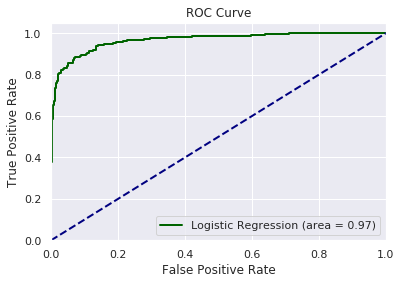

In [0]:
lr_fpr, lr_tpr, _ = roc_curve(y_test, prob_ls)
roc_auc =auc(lr_fpr, lr_tpr)
plt.figure()

plt.plot(lr_fpr, lr_tpr, color='darkgreen',
         lw=2, label='Logistic Regression (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


In [0]:
type(y_test)

pandas.core.series.Series

In [0]:
y_test.value_counts()

0    3376
1     239
Name: Passenger and Cabin Crew Injury, dtype: int64

In [0]:
y_train.value_counts()

0    13581
1      879
Name: Passenger and Cabin Crew Injury, dtype: int64

In [0]:
from sklearn.metrics import classification_report, confusion_matrix

In [0]:
y_pred_lr = model2.predict(X_test)

In [0]:
print(classification_report(y_pred_lr, y_test))
print(confusion_matrix(y_pred_lr, y_test))


              precision    recall  f1-score   support

           0       0.99      0.97      0.98      3448
           1       0.62      0.88      0.72       167

    accuracy                           0.97      3615
   macro avg       0.80      0.93      0.85      3615
weighted avg       0.98      0.97      0.97      3615

[[3356   92]
 [  20  147]]


In [0]:
from xgboost import XGBClassifier

In [0]:
model4 =XGBClassifier()

In [0]:
model4.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
model4.score(X_test,y_test)

0.9690179806362379

In [0]:
y_pred_xgb = model4.predict(X_test)

In [0]:
y_proba_xgb = model4.predict_proba(X_test)[:,1]


In [0]:
auc_score = roc_auc_score(y_test, y_proba_xgb)
auc_score

0.9687729282753971

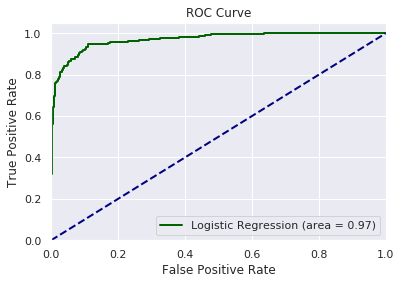

In [0]:
lr_fpr, lr_tpr, _ = roc_curve(y_test, y_proba_xgb)
roc_auc =auc(lr_fpr, lr_tpr)
plt.figure()

plt.plot(lr_fpr, lr_tpr, color='darkgreen',
         lw=2, label='Logistic Regression (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


In [0]:
print(classification_report(y_pred_xgb, y_test))
print(confusion_matrix(y_pred_xgb, y_test))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      3442
           1       0.63      0.87      0.73       173

    accuracy                           0.97      3615
   macro avg       0.81      0.92      0.86      3615
weighted avg       0.98      0.97      0.97      3615

[[3353   89]
 [  23  150]]


In [0]:
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [0]:
xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1)

In [0]:
from datetime import datetime

In [0]:
folds = 3
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=4, cv=skf.split(X_train,y_train), verbose=3, random_state=1001 )


random_search.fit(X_train, y_train)


Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  15 out of  15 | elapsed: 23.0min finished


RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x7f3449465258>,
                   error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.02, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=600,
                                           n_jobs=1, nthread=1,
                                           objectiv...
                                           reg_lambda=1, scale_pos_weight=1,
                                           seed=None, silent=True, subsample=1,
                                           verbosity=1),
                   iid='warn',

In [0]:
random_search.best_params_

{'colsample_bytree': 0.8,
 'gamma': 1.5,
 'max_depth': 5,
 'min_child_weight': 1,
 'subsample': 0.6}

In [0]:
random_search.best_score_

0.9747765761022988

In [0]:
model5 =XGBClassifier(colsample_bytree= 0.8,
 gamma= 1.5,
 max_depth= 5,
 min_child_weight= 1,
 subsample= 0.6)

In [0]:
model5.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=1.5,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.6, verbosity=1)

In [0]:
model5.score(X_test, y_test)

0.9742738589211618

In [0]:
y_proba_xgb = model5.predict_proba(X_test)[:,1]
auc_score = roc_auc_score(y_test, y_proba_xgb)
auc_score


0.9772625870035098

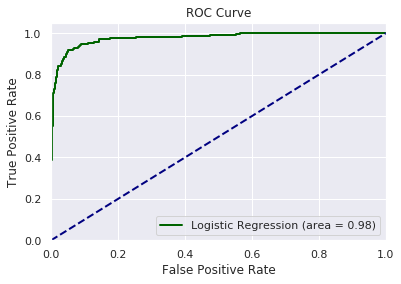

In [0]:
lr_fpr, lr_tpr, _ = roc_curve(y_test, y_proba_xgb)
roc_auc =auc(lr_fpr, lr_tpr)
plt.figure()

plt.plot(lr_fpr, lr_tpr, color='darkgreen',
         lw=2, label='Logistic Regression (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


In [0]:
y_pred_xgb = model5.predict(X_test)

In [0]:
print(classification_report(y_pred_xgb, y_test))
print(confusion_matrix(y_pred_xgb, y_test))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      3431
           1       0.69      0.90      0.78       184

    accuracy                           0.97      3615
   macro avg       0.84      0.94      0.88      3615
weighted avg       0.98      0.97      0.98      3615

[[3357   74]
 [  19  165]]


In [0]:
from keras.layers import Dense, GRU,LSTM, Embedding, Flatten, Bidirectional,GlobalMaxPool1D,Conv1D, Dropout
from keras.layers.embeddings import Embedding
from keras.optimizers import Adam, RMSprop, SGD
from keras.initializers import Constant
from keras.models import Sequential
from tensorflow.python.keras.preprocessing.text import Tokenizer
from tensorflow.python.keras.preprocessing.sequence import pad_sequences

In [0]:
model = Sequential()

In [0]:
model.add(Dense(64, activation='relu',input_shape=(300,)))
model.add(Dense(46, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [0]:
import tensorflow as tf

In [0]:
def auroc(y_true, y_pred):
    return tf.py_func(roc_auc_score, (y_true, y_pred), tf.double)

In [0]:

model.compile(loss='binary_crossentropy', optimizer='Adam',metrics=[auroc])


In [0]:
model.fit(X_train.values,y_train.values, epochs= 14,  batch_size=512, validation_data=[X_test.values, y_test.values])

Train on 14460 samples, validate on 3615 samples
Epoch 1/14
14460/14460 [==============================] - 1s 90us/step - loss: 0.4673 - auroc: 0.3637 - val_loss: 0.2764 - val_auroc: 0.4524
Epoch 2/14
14460/14460 [==============================] - 0s 30us/step - loss: 0.2363 - auroc: 0.4620 - val_loss: 0.2471 - val_auroc: 0.5412
Epoch 3/14
14460/14460 [==============================] - 0s 30us/step - loss: 0.2290 - auroc: 0.6366 - val_loss: 0.2412 - val_auroc: 0.8224
Epoch 4/14
14460/14460 [==============================] - 0s 29us/step - loss: 0.2244 - auroc: 0.9010 - val_loss: 0.2332 - val_auroc: 0.9114
Epoch 5/14
14460/14460 [==============================] - 0s 30us/step - loss: 0.2079 - auroc: 0.9325 - val_loss: 0.2044 - val_auroc: 0.9303
Epoch 6/14
14460/14460 [==============================] - 0s 29us/step - loss: 0.1782 - auroc: 0.9492 - val_loss: 0.1796 - val_auroc: 0.9488
Epoch 7/14
14460/14460 [==============================] - 0s 29us/step - loss: 0.1392 - auroc: 0.9588 - v

In [0]:
y_pred_nn = model.predict_classes(X_test)

In [0]:
print(confusion_matrix(y_pred_nn, y_test.values))
print(classification_report(y_pred_nn, y_test.values))

[[3332   63]
 [  44  176]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      3395
           1       0.74      0.80      0.77       220

    accuracy                           0.97      3615
   macro avg       0.86      0.89      0.88      3615
weighted avg       0.97      0.97      0.97      3615



In [0]:
tokenizer = Tokenizer(num_words=10000)

tokenizer.fit_on_texts(df_data_new.Summary)

sequences = tokenizer.texts_to_sequences(df_data_new.Summary)

In [0]:
word_index = tokenizer.word_index

In [0]:
X_train_k, X_test_k, y_train_k, y_test_k = train_test_split(sequences, df_data_new['Passenger and Cabin Crew Injury'], test_size=0.20, random_state=42)

In [0]:
X_train_k = preprocessing.sequence.pad_sequences(X_train_k, maxlen=300)
X_test_k = preprocessing.sequence.pad_sequences(X_test_k, maxlen=300)

In [0]:
model_emb = Sequential()
model_emb.add(Embedding(10000,200, input_length=300))
model_emb.add(Flatten())
model_emb.add(Dense(46, activation='relu'))
model_emb.add(Dense(46, activation='relu'))
model_emb.add(Dropout(0.1))
model_emb.add(Dense(18, activation='relu'))
model_emb.add(Dense(6, activation='relu'))
model_emb.add(Dense(1, activation='sigmoid'))

model_emb.compile(optimizer='Adam', loss='binary_crossentropy', metrics =[auroc])
model_emb.summary()

  
    
  


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_22 (Embedding)     (None, 300, 200)          2000000   
_________________________________________________________________
flatten_18 (Flatten)         (None, 60000)             0         
_________________________________________________________________
dense_104 (Dense)            (None, 46)                2760046   
_________________________________________________________________
dense_105 (Dense)            (None, 46)                2162      
_________________________________________________________________
dropout_12 (Dropout)         (None, 46)                0         
_________________________________________________________________
dense_106 (Dense)            (None, 18)                846       
_________________________________________________________________
dense_107 (Dense)            (None, 6)                 114       
__________

In [0]:
history = model_emb.fit(X_train_k, y_train_k, epochs =2, batch_size=256, validation_data=[X_test_k, y_test_k])

Train on 14460 samples, validate on 3615 samples
Epoch 1/2
14460/14460 [==============================] - 18s 1ms/step - loss: 0.2526 - auroc: 0.6559 - val_loss: 0.1422 - val_auroc: 0.9378
Epoch 2/2
14460/14460 [==============================] - 14s 965us/step - loss: 0.0879 - auroc: 0.9691 - val_loss: 0.0818 - val_auroc: 0.9691


In [0]:
y_pred_emb = model_emb.predict_classes(X_test_k)

In [0]:
print(confusion_matrix(y_pred_emb, y_test_k.values))
print(classification_report(y_pred_emb, y_test_k.values))

[[3330   55]
 [  46  184]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      3385
           1       0.77      0.80      0.78       230

    accuracy                           0.97      3615
   macro avg       0.88      0.89      0.88      3615
weighted avg       0.97      0.97      0.97      3615



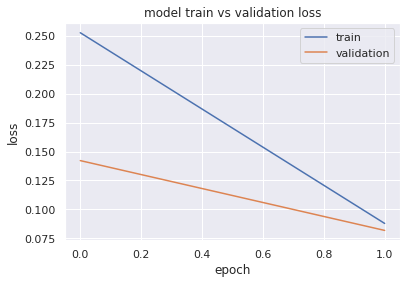

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc ='upper right')
plt.show()

In [0]:
X_train_lstm = preprocessing.sequence.pad_sequences(X_train_k, maxlen=500)
X_test_lstm = preprocessing.sequence.pad_sequences(X_test_k, maxlen=500)

In [0]:
model_lstm = Sequential()
model_lstm.add(Embedding(10000,32))
model_lstm.add(Bidirectional(LSTM(50, return_sequences=True, dropout=0.1,recurrent_dropout=0.1)))
model_lstm.add(GlobalMaxPool1D())
model_lstm.add(Dense(50, activation='relu'))
model_lstm.add(Dropout(0.1))
model_lstm.add(Dense(1, activation='sigmoid'))
model_lstm.compile(optimizer='Adam', loss='binary_crossentropy', metrics =[auroc])
model_lstm.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
bidirectional_3 (Bidirection (None, None, 100)         33200     
_________________________________________________________________
global_max_pooling1d_3 (Glob (None, 100)               0         
_________________________________________________________________
dense_42 (Dense)             (None, 50)                5050      
_________________________________________________________________
dropout_3 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_43 (Dense)             (None, 1)                 51        
Total params: 358,301
Trainable params: 358,301
Non-trainable params: 0
_________________________________________________________________


In [0]:
y = model_lstm.fit(X_train_lstm, y_train_k, epochs =8, batch_size=512, validation_data=[X_test_lstm, y_test_k])

Train on 14460 samples, validate on 3615 samples
Epoch 1/8
14460/14460 [==============================] - 179s 12ms/step - loss: 0.4608 - auroc: 0.5051 - val_loss: 0.2651 - val_auroc: 0.7482
Epoch 2/8
14460/14460 [==============================] - 173s 12ms/step - loss: 0.2290 - auroc: 0.5820 - val_loss: 0.2325 - val_auroc: 0.9216
Epoch 3/8
14460/14460 [==============================] - 174s 12ms/step - loss: 0.1803 - auroc: 0.8829 - val_loss: 0.1664 - val_auroc: 0.9117
Epoch 4/8
14460/14460 [==============================] - 173s 12ms/step - loss: 0.1212 - auroc: 0.8992 - val_loss: 0.1568 - val_auroc: 0.9209
Epoch 5/8
14460/14460 [==============================] - 173s 12ms/step - loss: 0.1485 - auroc: 0.8409 - val_loss: 0.1598 - val_auroc: 0.9369
Epoch 6/8
14460/14460 [==============================] - 174s 12ms/step - loss: 0.1081 - auroc: 0.9462 - val_loss: 0.1129 - val_auroc: 0.9563
Epoch 7/8
14460/14460 [==============================] - 174s 12ms/step - loss: 0.0757 - auroc: 0.9

In [0]:
y_pred_lstm = model_lstm.predict_classes(X_test_lstm)

In [0]:
print(confusion_matrix(y_pred_lstm, y_test_k.values))
print(classification_report(y_pred_lstm, y_test_k.values))

[[3303   62]
 [  73  177]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3365
           1       0.74      0.71      0.72       250

    accuracy                           0.96      3615
   macro avg       0.86      0.84      0.85      3615
weighted avg       0.96      0.96      0.96      3615



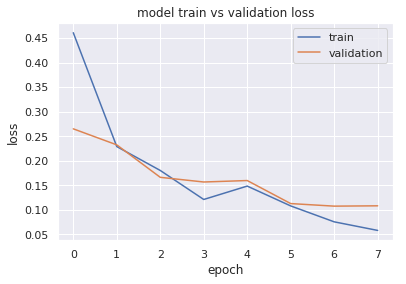

In [0]:
plt.plot(y.history['loss'])
plt.plot(y.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc ='upper right')
plt.show()